In [29]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


In [30]:
img=image.load_img("C:/Users/HP/Desktop/cv/basedata/training/black/3.jpg")


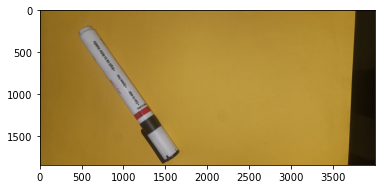

In [31]:
plt.imshow(img)

In [32]:
cv2.imread("C:/Users/HP/Desktop/cv/basedata/training/black/3.jpg").shape

(4000, 1844, 3)

In [33]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)


In [34]:
train_dataset=train.flow_from_directory("C:/Users/HP/Desktop/cv/basedata/training",
                                        target_size=(200,200),batch_size=3,class_mode='binary')

validation_dataset=train.flow_from_directory("C:/Users/HP/Desktop/cv/basedata/validation",
                                        target_size=(200,200),batch_size=3,class_mode='binary')

Found 30 images belonging to 2 classes.
Found 32 images belonging to 2 classes.


In [35]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                                         tf.keras.layers.MaxPool2D(2,2),
                                                         #
                                                         tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                                         tf.keras.layers.MaxPool2D(2,2),
                                                                                #
                                                        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                                         tf.keras.layers.MaxPool2D(2,2),
                                                                               ##
                                                        tf.keras.layers.Flatten(),
                                                        tf.keras.layers.Dense(512,activation='relu'),
                                                           ##
                                                        tf.keras.layers.Dense(1,activation='sigmoid')])
                                                                               
                                                                                
                                                    


In [36]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              metrics = ['acc'])

In [38]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 3,
                     epochs= 10,
                     validation_data = validation_dataset)

Epoch 1/10
3/3 [==============================] - 9s 4s/step - loss: 5.3532 - acc: 0.6667 - val_loss: 0.9755 - val_acc: 0.5000
Epoch 2/10
3/3 [==============================] - 7s 3s/step - loss: 0.7884 - acc: 0.6111 - val_loss: 0.7725 - val_acc: 0.5000
Epoch 3/10
3/3 [==============================] - 7s 3s/step - loss: 1.0159 - acc: 0.2361 - val_loss: 0.6143 - val_acc: 0.7812
Epoch 4/10
3/3 [==============================] - 7s 3s/step - loss: 0.6795 - acc: 0.7361 - val_loss: 0.9185 - val_acc: 0.5000
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 2.3195 - acc: 0.7500 - val_loss: 0.6150 - val_acc: 0.6562
Epoch 6/10
3/3 [==============================] - 7s 3s/step - loss: 0.7341 - acc: 0.4444 - val_loss: 0.6089 - val_acc: 0.8750
Epoch 7/10
3/3 [==============================] - 7s 3s/step - loss: 0.6283 - acc: 0.7222 - val_loss: 0.4478 - val_acc: 0.8750
Epoch 8/10
3/3 [==============================] - 7s 3s/step - loss: 0.5755 - acc: 0.7917 - val_loss: 0.4576 - 

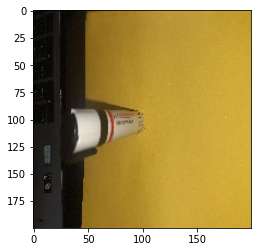

black 


In [28]:
dir_path="C:/Users/HP/Desktop/cv/basedata/testing"

for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images=np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("black ")
    else:
        print("red")
    